In [1]:
import numpy as np
import pandas as pd 


In [2]:
# importing Data
listings = pd.read_csv('../raw/listings.csv')
calender = pd.read_csv('../raw/calendar.csv')

# Data Cleaning

### Handling Duplicates

In [5]:
# Checking for duplicates
listings.duplicated().sum()

0

### Handling Data Types

In [7]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [8]:
calender.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

In [9]:
# updating price col in calender, listings tables
calender['price'] = calender['price'].str.replace('[$,]', '', regex=True).astype(float)
listings['price'] = listings['price'].astype(str).replace('[$,]', '', regex=True).astype(float)

### Handling Nulls 

In [11]:
# checking for null values
listings.isnull().sum()

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               60
Length: 75, dtype: int64

In [12]:
# changing null values in price to the average price
listings['price'] = listings['price'].fillna(listings['price'].mean())

# Analysis

In [14]:
# Measuring average Price || 128.4
listings[['price', 'review_scores_location', 'review_scores_value', 
    'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'
         ]].describe()

,price,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,426.000000,366.000000,366.000000,0.0,426.000000,426.000000,426.000000,426.000000,366.000000
mean,128.482500,4.670656,4.729508,NaN,5.694836,4.312207,1.377934,0.004695,2.145137
std,121.604294,0.372563,0.311464,NaN,6.242610,6.302096,2.773892,0.068438,2.106637
min,24.000000,3.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.030000
25%,80.000000,4.532500,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.572500
50%,110.000000,4.795000,4.800000,NaN,3.000000,2.000000,0.000000,0.000000,1.450000
75%,135.000000,4.930000,4.930000,NaN,8.000000,4.000000,1.000000,0.000000,3.040000
max,1750.000000,5.000000,5.000000,NaN,25.000000,25.000000,11.000000,1.000000,11.220000


In [15]:
import matplotlib.pyplot as plt

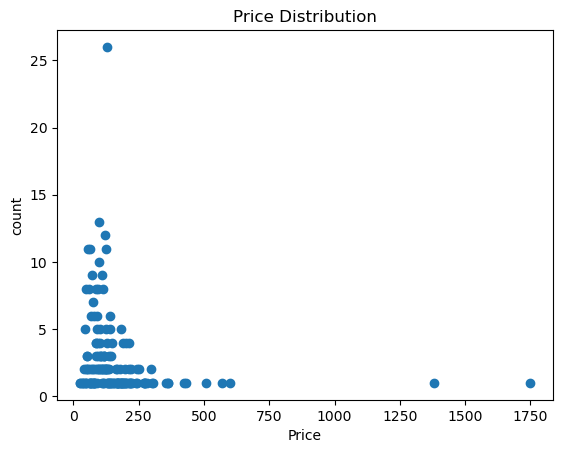

In [16]:
# Price distribution 
price_count = listings.groupby(['price'])['price'].count()
price_avg = listings.groupby(['price'])['price'].mean()

# scatter plot
plt.scatter(price_avg, price_count)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

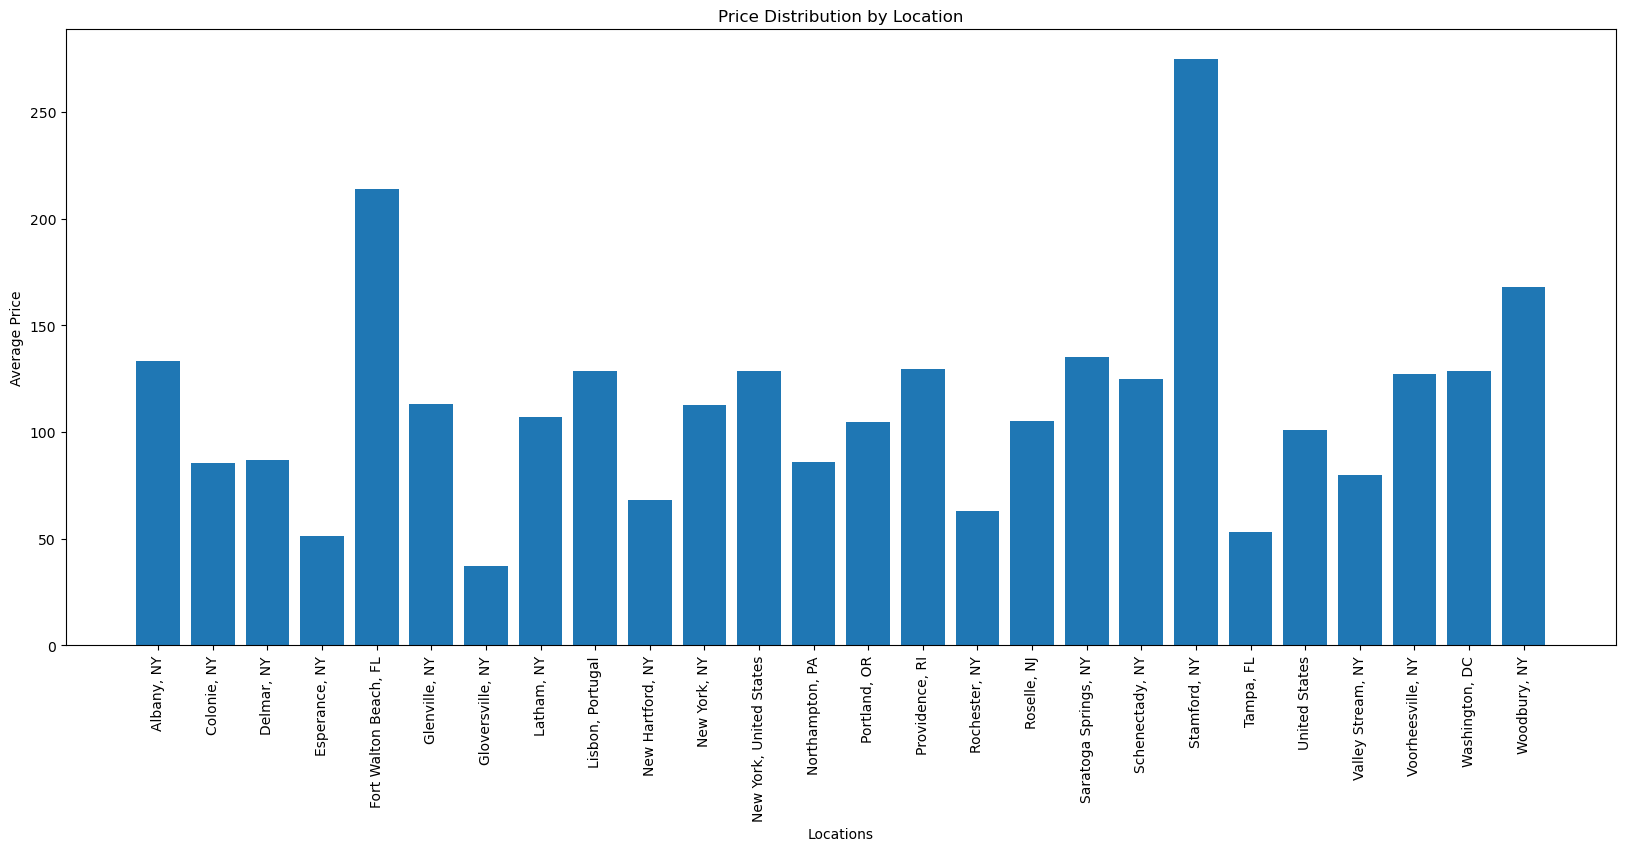

In [17]:
# Price distribution by Location
price_avg = listings.groupby(['host_location'])['price'].mean().reset_index()
price_avg['host_location'] = price_avg['host_location'].astype(str)

# barplot
plt.figure(figsize=(20,8))
plt.bar(price_avg['host_location'], price_avg['price'] )
plt.title('Price Distribution by Location')
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(price_avg['host_location'], rotation=90)
plt.show()

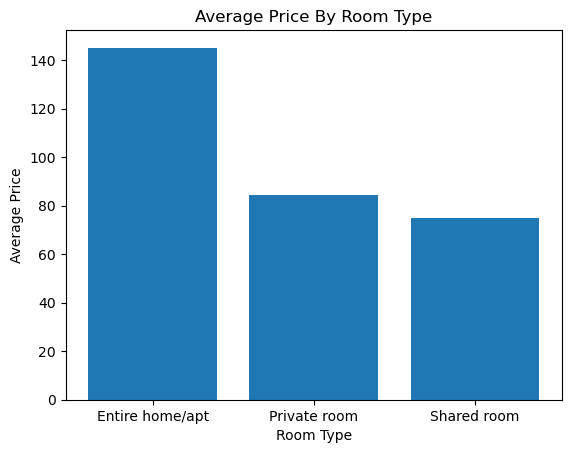

In [58]:
# Avg Price per room type
avg_price = listings.groupby('room_type')['price'].mean().reset_index()

# barplot
plt.bar(avg_price['room_type'], avg_price['price'] )
plt.title('Average Price By Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

In [19]:
# Room type count
listings.groupby('room_type')['room_type'].count()

room_type
Entire home/apt    310
Private room       114
Shared room          2
Name: room_type, dtype: int64

In [20]:
# Super host percentage
total_count = listings['host_is_superhost'].count()
super_count = listings[listings['host_is_superhost'] == 't']['host_is_superhost'].count()

super_host_percentage = super_count / total_count * 100


print(f'{super_host_percentage.round(2)}%')

55.61%


In [21]:
# avg review score
avg_review = listings['review_scores_rating'].mean().round(2)

print(f'Average Reveiw Score: {avg_review}')

# Avg cleanliness rating 
avg_clean = listings['review_scores_cleanliness'].mean().round(2)

print(f'Average Cleaning Score: {avg_clean}')

# avg communication rating
avg_comm = listings['review_scores_communication'].mean().round(2)

print(f'Average Communication Score: {avg_comm}')


Average Reveiw Score: 4.77
Average Cleaning Score: 4.78
Average Communication Score: 4.87


In [22]:
# Total Available Days, Total Unavailable Days
available = calender.groupby('available')['available'].count()
print(available)

# Availability Percentage
percentage = available['t'] / calender['available'].count() * 100

print(f'Availability Percentage: {percentage.round(2)}%')

available
f    61211
t    94279
Name: available, dtype: int64
Availability Percentage: 60.63%


In [23]:
# Avg minimum nights
avg_min = calender['minimum_nights'].mean().round(2)

print(f'Avg minimum nights: {avg_min}')

# Avg maximum nights 
avg_max = calender['maximum_nights'].mean().round(2)

print(f'Avg maximum nights : {avg_max}')

Avg minimum nights: 6.2
Avg maximum nights : 749.75
